In [1]:
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.models import Sequential
from keras.layers import Dropout, Flatten, Dense
from keras.backend.tensorflow_backend import set_session
from keras.models import Model
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import backend as K
#配置GPU，如果不是gpu版本，comment这一部分
config = tf.ConfigProto()  
config.gpu_options.allow_growth = True  
config.gpu_options.per_process_gpu_memory_fraction = 0.8
set_session(tf.Session(config=config)) 
print('configed')

Using TensorFlow backend.


configed


In [12]:
# path to the model weights files.

#del model
# dimensions of our images.
img_width, img_height = 224, 224
train_data_dir = 'D:\\EE628\\final_dogs&cats\\data\\train'
validation_data_dir = 'D:\\EE628\\final_dogs&cats\\data\\validation'
predict_data_dir = 'D:\\EE628\\final_dogs&cats\\data\\test'
path_folder='D:\\EE628\\final_dogs&cats\\Training\\'
epochs = 100
batch_size = 128


In [13]:
#设置图像生成器
train_datagen = ImageDataGenerator(
    rescale=1. / 255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

# this is the augmentation configuration we will use for testing:
# only rescaling
test_datagen = ImageDataGenerator(rescale=1. / 255)

train_generator = train_datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
    validation_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode='binary')

predict_generator = test_datagen.flow_from_directory(
    predict_data_dir,
    target_size=(img_width, img_height),
    batch_size=batch_size,
    class_mode=None,)

print("Image prepared")

Found 16666 images belonging to 2 classes.
Found 8334 images belonging to 2 classes.
Found 12500 images belonging to 1 classes.
Image prepared


In [14]:
print(len(train_generator))

131


In [15]:
import time
start_time=time.time()
#del model
input_shape = (img_width, img_height, 3)
model = Sequential()
model.add(Conv2D(32, (3, 3), input_shape=input_shape))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(64))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(1))
model.add(Activation('sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
activation_11 (Activation)   (None, 222, 222, 32)      0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 109, 109, 32)      9248      
_________________________________________________________________
activation_12 (Activation)   (None, 109, 109, 32)      0         
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 54, 54, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 52, 52, 64)        18496     
__________

In [16]:

'''
model = Model(input= vgg16_model.input, output= top_model(vgg16_model.output))
# set the first 25 layers (up to the last conv block)
for layer in model.layers[:25]:
    layer.trainable = False
model.summary()

# compile the model with a SGD/momentum optimizer
# and a very slow learning rate.
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.SGD(lr=1e-4, momentum=0.9),
              metrics=['accuracy'])
'''
# fine-tune the model
hist_cnn=model.fit_generator(
                train_generator,
                steps_per_epoch=16666// batch_size+1 ,
                epochs=epochs,
                validation_data=validation_generator,
                validation_steps=8334// batch_size+1)

model.save_weights(path_folder+'2_weight_cnn.h5')
print('Model Saved to',path_folder+'2_weight_cnn.h5')

Epoch 1/100
131/131 [==============================] - 161s 1s/step - loss: 0.7127 - acc: 0.5991 - val_loss: 0.5639 - val_acc: 0.7235
Epoch 2/100
131/131 [==============================] - 150s 1s/step - loss: 0.5891 - acc: 0.6884 - val_loss: 0.5179 - val_acc: 0.7483
Epoch 3/100
131/131 [==============================] - 149s 1s/step - loss: 0.5471 - acc: 0.7268 - val_loss: 0.4864 - val_acc: 0.7634
Epoch 4/100
131/131 [==============================] - 150s 1s/step - loss: 0.5177 - acc: 0.7464 - val_loss: 0.5183 - val_acc: 0.7709
Epoch 5/100
131/131 [==============================] - 151s 1s/step - loss: 0.4858 - acc: 0.7680 - val_loss: 0.4796 - val_acc: 0.7719
Epoch 6/100
131/131 [==============================] - 150s 1s/step - loss: 0.4641 - acc: 0.7822 - val_loss: 0.4675 - val_acc: 0.7821
Epoch 7/100
131/131 [==============================] - 149s 1s/step - loss: 0.4518 - acc: 0.7942 - val_loss: 0.4426 - val_acc: 0.8024
Epoch 8/100
131/131 [==============================] - 149s 1s

Epoch 62/100
131/131 [==============================] - 149s 1s/step - loss: 0.2622 - acc: 0.8970 - val_loss: 0.3572 - val_acc: 0.8733
Epoch 63/100
131/131 [==============================] - 149s 1s/step - loss: 0.2629 - acc: 0.8965 - val_loss: 0.3794 - val_acc: 0.8828
Epoch 64/100
131/131 [==============================] - 150s 1s/step - loss: 0.2555 - acc: 0.8995 - val_loss: 0.3186 - val_acc: 0.8711
Epoch 65/100
131/131 [==============================] - 151s 1s/step - loss: 0.2629 - acc: 0.8975 - val_loss: 0.3609 - val_acc: 0.8563
Epoch 66/100
131/131 [==============================] - 150s 1s/step - loss: 0.2617 - acc: 0.8960 - val_loss: 0.3522 - val_acc: 0.8924
Epoch 67/100
131/131 [==============================] - 149s 1s/step - loss: 0.2542 - acc: 0.9026 - val_loss: 0.3467 - val_acc: 0.8834
Epoch 68/100
131/131 [==============================] - 148s 1s/step - loss: 0.2645 - acc: 0.8953 - val_loss: 0.3258 - val_acc: 0.8725
Epoch 69/100
131/131 [==============================] -

In [40]:
hist_cnn.history

{'acc': [0.5996639865594624,
  0.6888275531378883,
  0.7272890915493568,
  0.7455298211570835,
  0.7677307091997577,
  0.7820712828227027,
  0.7943717748924534,
  0.8034321372926443,
  0.8105124204682085,
  0.8136925477305195,
  0.8261730468861127,
  0.8272530901307578,
  0.8332533301045939,
  0.8401536061585515,
  0.8421336853688725,
  0.8451938077666158,
  0.8487339493365158,
  0.8493939757375718,
  0.8507740309898498,
  0.8530541221720395,
  0.8555742229474602,
  0.8593543741892727,
  0.8648145925479391,
  0.8688947557544674,
  0.8645145805975291,
  0.8696147845985365,
  0.8700948037563875,
  0.8708148325718452,
  0.8720748829667084,
  0.8742949717631078,
  0.877955118211881,
  0.877175087010633,
  0.8795151806072243,
  0.8796951878146652,
  0.8810752430240261,
  0.8822752910187933,
  0.8821552862257541,
  0.8846753869725635,
  0.8808952358165852,
  0.8901356053884527,
  0.8876155045772678,
  0.8868354733760196,
  0.8877955117847086,
  0.8849753989730436,
  0.8858754349816365,
  0.8

In [28]:
import pandas as pd
hist_df=pd.DataFrame(hist_cnn.history)
hist_df.to_csv(path_folder+'2_simple_cnn_hist.csv',index_label ='epochs',header=True)
print('history saved')

history saved


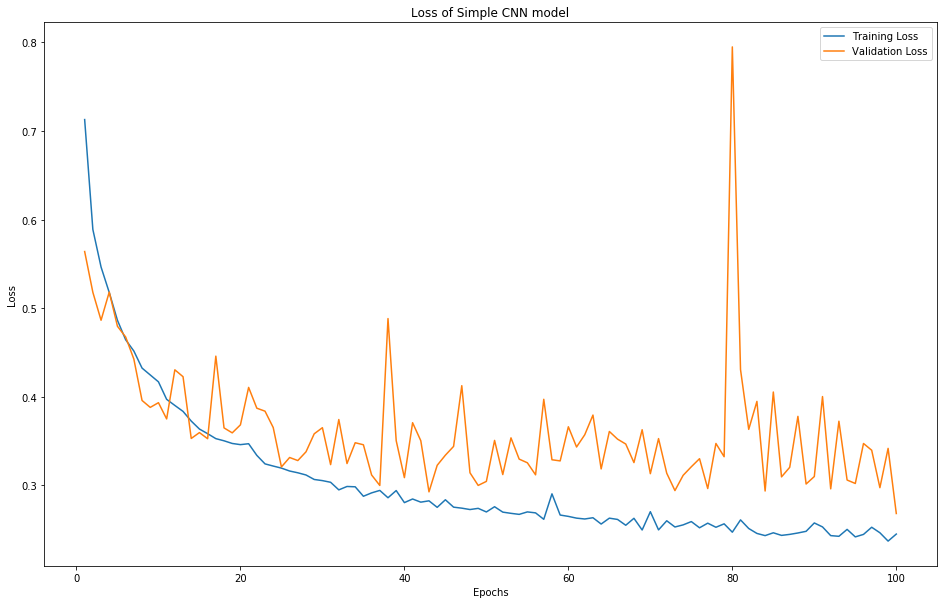

Plot saved


In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(16,10)) 
epochs = range(1, len(hist_cnn.history['acc']) + 1)
plt.plot(epochs, hist_cnn.history['loss'], label='Training Loss') 
plt.plot(epochs, hist_cnn.history['val_loss'], label='Validation Loss') 

plt.title('Loss of Simple CNN model')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.savefig(path_folder+'2_loss_simplecnn.jpg')
plt.show()
print('Plot saved')

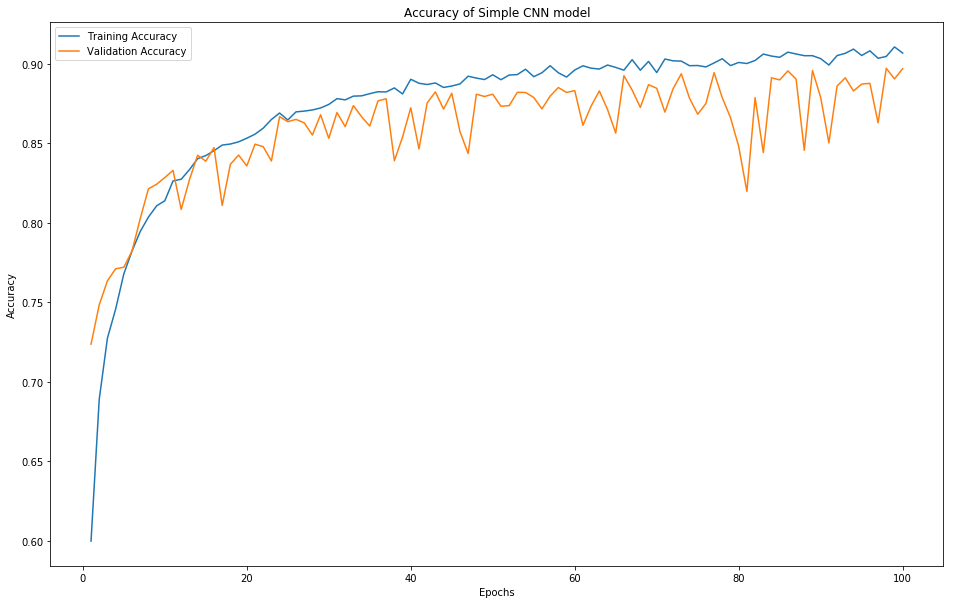

Plot saved


In [20]:
plt.figure(figsize=(16,10)) 
epochs = range(1, len(hist_cnn.history['acc']) + 1)
plt.plot(epochs, hist_cnn.history['acc'], label='Training Accuracy') 
plt.plot(epochs, hist_cnn.history['val_acc'], label='Validation Accuracy') 
plt.title('Accuracy of Simple CNN model')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.savefig(path_folder+'2_acc_simplecnn.jpg')
plt.show()
print('Plot saved')